In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
ml_1m_ratings = pd.read_csv('./movie/ratings.dat', sep='::', header=None)
ml_1m_ratings.rename(columns={0: 'userId', 1: 'itemId', 2: 'rating', 3: 'timestamp'}, inplace=True)
ml_1m_ratings.drop('timestamp', axis=1, inplace=True)
ml_1m_ratings

C:\Users\Mig\AppData\Local\Temp\ipykernel_7968\93103487.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ml_1m_ratings = pd.read_csv('./movie/ratings.dat', sep='::', header=None)


,userId,itemId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [73]:
def describe_col(ml_1m_ratings, col):
    unique_counts = ml_1m_ratings[col].value_counts()
    print(f'count/no. of occurences of each unique {col} out of {ml_1m_ratings.shape[0]}: \n')
    print(unique_counts)

    unique_ids = ml_1m_ratings[col].unique()
    print(unique_ids)
    print(f'total unique values: {len(unique_ids)}')

# userId column

In [74]:
describe_col(ml_1m_ratings, 'userId')

count/no. of occurences of each unique userId out of 1000209: 

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: userId, Length: 6040, dtype: int64
[   1    2    3 ... 6038 6039 6040]
total unique values: 6040


# itemId column

In [75]:
describe_col(ml_1m_ratings, 'itemId')

count/no. of occurences of each unique itemId out of 1000209: 

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: itemId, Length: 3706, dtype: int64
[1193  661  914 ... 2845 3607 2909]
total unique values: 3706


# rating column

In [76]:
describe_col(ml_1m_ratings, 'rating')

count/no. of occurences of each unique rating out of 1000209: 

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64
[5 3 4 2 1]
total unique values: 5


6040
6040
userId
3706
3706
itemId


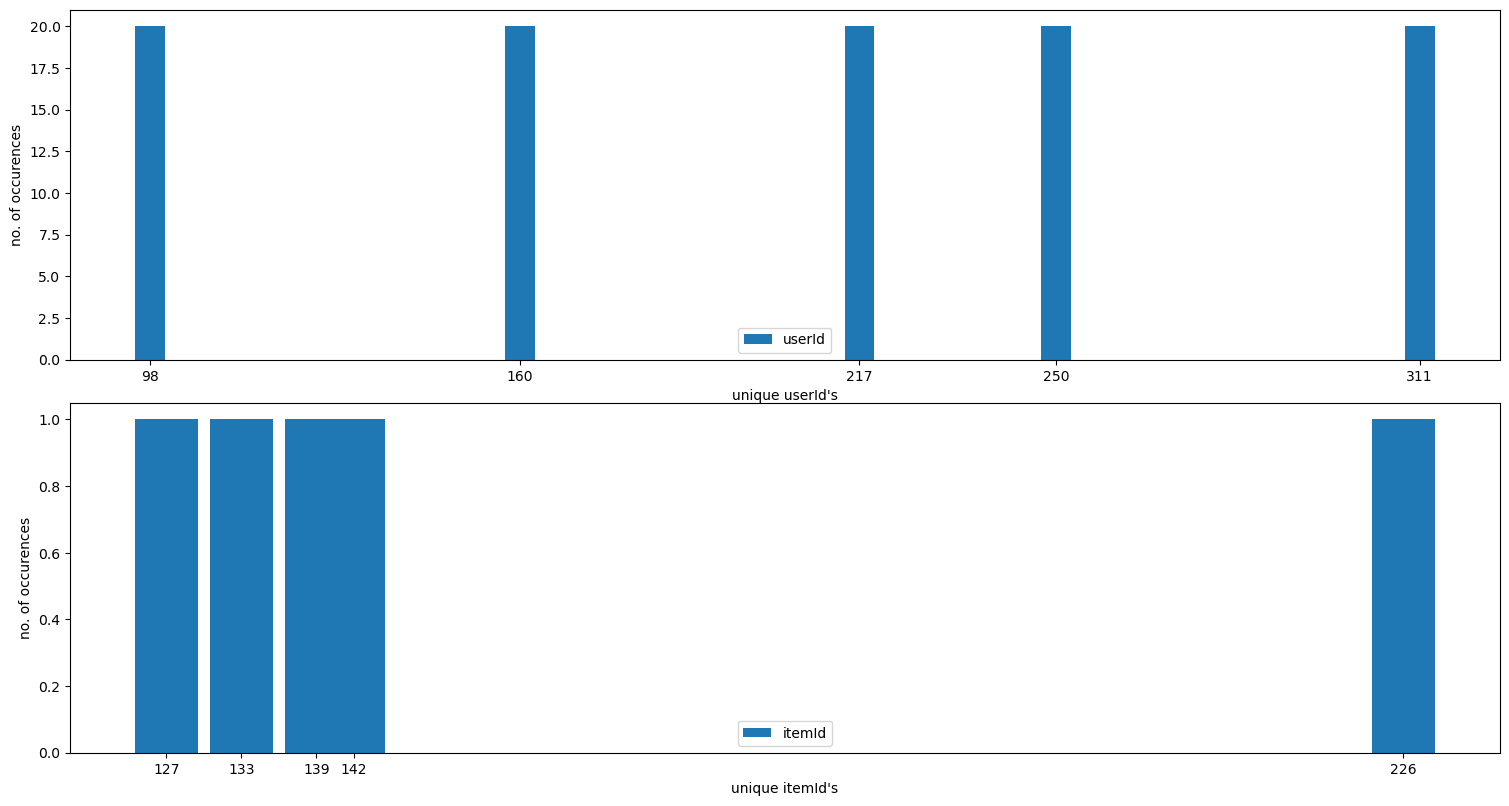

In [77]:
def analyze(user_item__df, cols=['userId', 'itemId']):
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    fig.tight_layout(pad=1)
    
    
    for index, column in enumerate(cols):
        
        unique, counts = np.unique(user_item__df[column], return_counts=True)
        x = list(zip(unique, counts))
        x.sort(key=lambda elem: elem[1])
        sorted_unique, sorted_counts = zip(*x)
        
        print(len(sorted_unique))
        print(len(sorted_counts))

        print(column)
        axes.flat[index].bar(sorted_unique[:5], sorted_counts[:5], width=5, label=column)
        axes.flat[index].set_ylabel('no. of occurences')
        axes.flat[index].set_xlabel(f"unique {column}'s")
        axes.flat[index].set_xticks(sorted_unique[:5], rotation=90)
        axes.flat[index].legend()

    plt.show()
    # ax.bar(unique, )

analyze(ml_1m_ratings)

# Insights:
1. In 1m rows of ratings there are 6040 unique users
2. In 1m rows of ratings there are 3706 unique items that were rated

# Knowledge Graph/Network analysis

In [78]:
# 20782 rows
kg = pd.read_csv('./movie/kg.txt', sep='\t', header=None)
kg.rename(columns={0: 'head', 1: 'relation', 2: 'tail'}, inplace=True)
kg

,head,relation,tail
0,749,film.film.writer,2347
1,1410,film.film.language,2348
2,1037,film.film.language,2348
3,1088,film.film.writer,2349
4,1391,film.film.language,2348
...,...,...,...
20777,2308,film.film.writer,4284
20778,869,film.film.language,2348
20779,1953,film.film.genre,2362
20780,2705,film.film.director,5417


In [79]:
describe_col(kg, 'head')

count/no. of occurences of each unique head out of 20782: 

1200    24
2230    24
2231    23
2123    22
1161    18
        ..
489      2
468      2
2072     2
967      2
2282     1
Name: head, Length: 2445, dtype: int64
[ 749 1410 1037 ... 2072 1560 2282]
total unique values: 2445


In [80]:
describe_col(kg, 'relation')

count/no. of occurences of each unique relation out of 20782: 

film.film.genre       5271
film.film.writer      3476
film.film.language    3135
film.film.director    2581
film.film.country     2256
film.film.star        2164
film.film.rating      1899
Name: relation, dtype: int64
['film.film.writer' 'film.film.language' 'film.film.genre'
 'film.film.star' 'film.film.country' 'film.film.rating'
 'film.film.director']
total unique values: 7


In [81]:
describe_col(kg, 'tail')

count/no. of occurences of each unique tail out of 20782: 

2348    2252
2353    1734
2362    1227
2359    1064
2350     970
        ... 
4731       1
4732       1
4733       1
4735       1
7007       1
Name: tail, Length: 4563, dtype: int64
[2347 2348 2349 ... 7005 7006 7007]
total unique values: 4563


# Analyze what nodes are connected to who

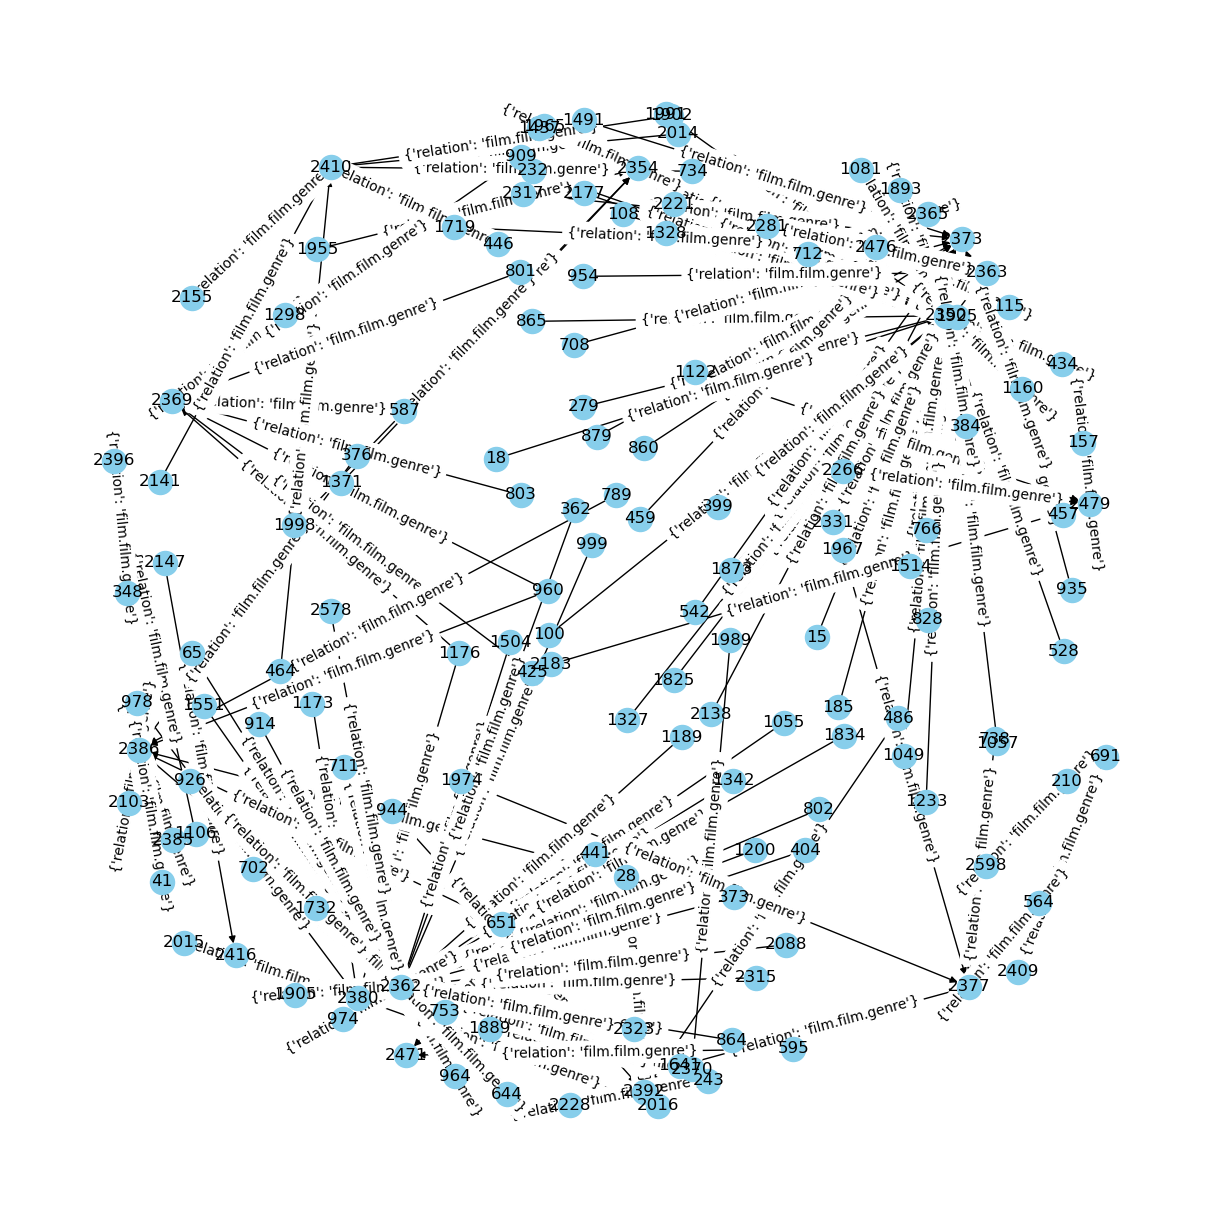

In [84]:
import networkx as nx


def visualize_graph(kg, limit=500, edge='film.film.genre', node_color='skyblue'):
    # see first 500 rows
    G = nx.from_pandas_edgelist(kg[:limit].loc[kg['relation'] == edge], source='head', target='tail', edge_attr=True, create_using=nx.MultiDiGraph())
    pos = nx.spring_layout(G, k=0.5)

    plt.figure(figsize=(12, 12))

    nx.draw(G, with_labels=True, node_color=node_color, edge_cmap=plt.cm.Blues, pos=pos)
    nx.draw_networkx_edge_labels(G, pos=pos)
    plt.show()

visualize_graph(kg)

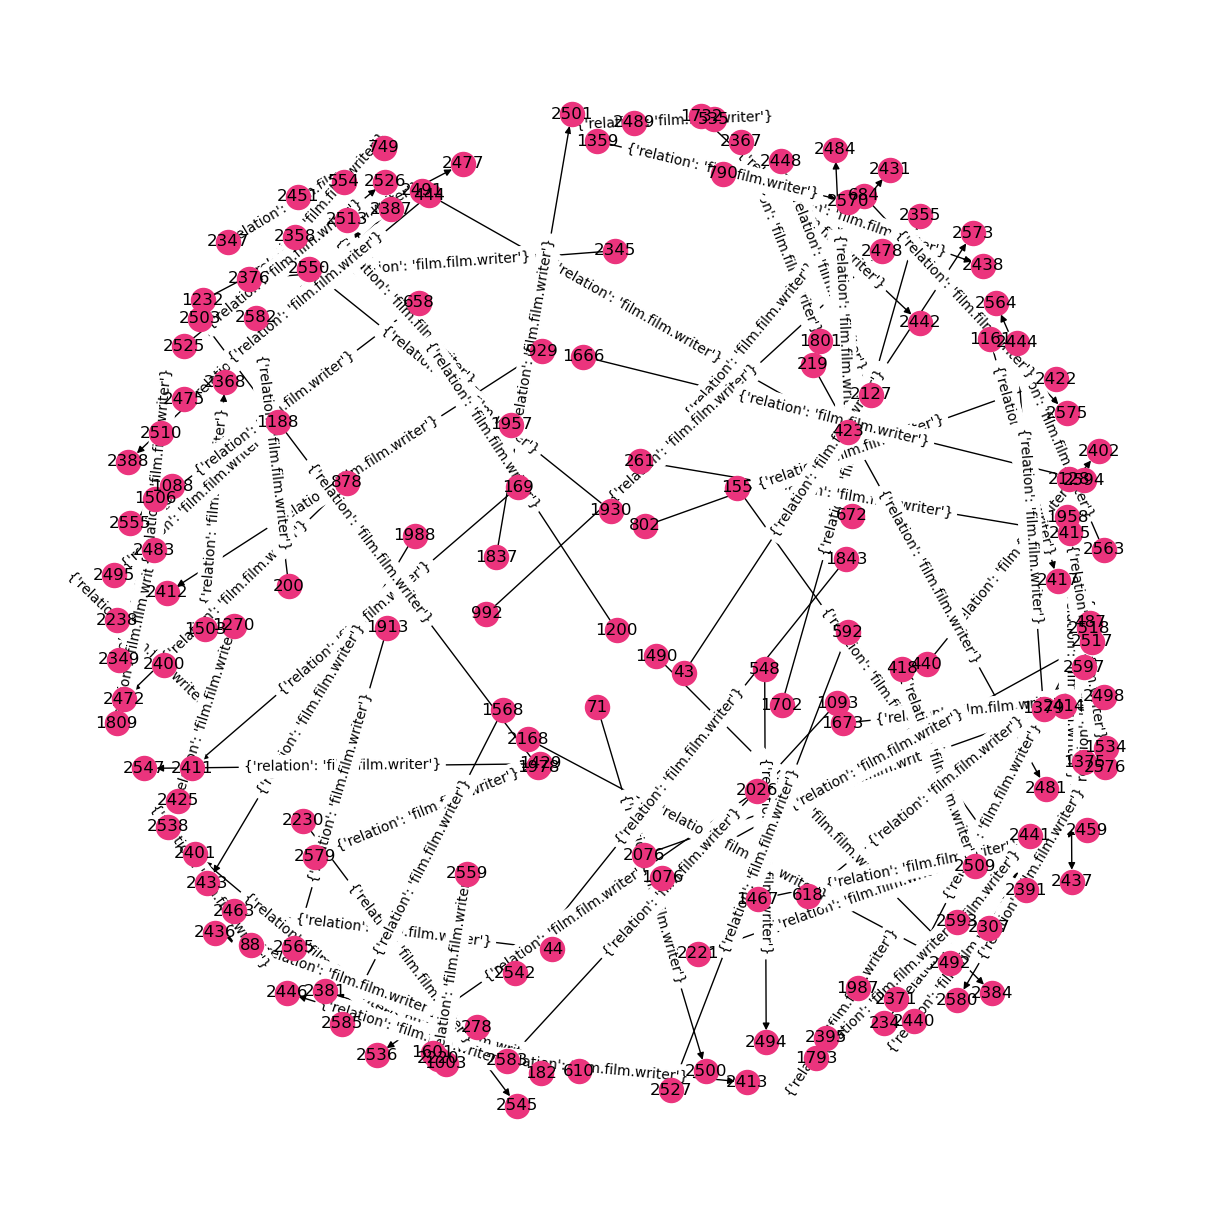

In [85]:
visualize_graph(kg, edge='film.film.writer', node_color='#eb347d')

# Does the head and tail entities appear as an item in the user item interaction data?